In [1]:
import numpy as np, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_spec(qobj,rlz=None,cn=2,bnum=10,lmin=40,lmax=2048,ylim=[-2,2]):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    Mkk, Vkk, Skk, Okk, N0 = local.load_spec(qobj,mb,rlz=rlz,cn=cn,outN0=True)
    st0 = ana.PTEs(Okk,Skk,x1pte=True)
    st1 = ana.PTEs(Okk,Skk,x1pte=True,diag=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xlim=[mb.lmin,lmax],ylim=ylim,ylab=r'$10^2L^{0.5}C_L^{\varpi\varpi}$')
    #errorbar(mb.bc-5,(Okk-Mkk),yerr=Vkk,fmt='o')
    errorbar(mb.bc-5,mb.bc**0.5*(Okk-N0/100.-Mkk+N0/99.)*1e6,yerr=mb.bc**0.5*Vkk*1e6,fmt='o')
    #errorbar(mb.bc+5,mb.bc**0.5*N0*1e6/100.,yerr=mb.bc**0.5*Vkk*1e6,fmt='o')
    #plot(aobj.l,aobj.ckk,color='k',ls='--')
    plot(aobj.l,aobj.l**0.5*aobj.ckk*1e6,color='k',ls='--')
    figtext(.7,.80,r'$\chi$-PTE:'+str(np.round(st0.px1,2)))
    figtext(.7,.75,r'$\chi^2$-PTE:'+str(np.round(st0.px2,2)))
    figtext(.7,.70,r'$\chi^2$-PTE (diag):'+str(np.round(st1.px2,2)))
    axhline(0,color='k')
    show()

In [18]:
dirs = local.data_directory()
aobj = local.init_analysis_params(qid='boss_s15d',fltr='none',wind='com15',ivar='noivar',ptsr='base')
bobj = local.init_analysis_params(qid='boss_s15d',fltr='cinv',wind='base',ivar='base',ptsr='base')
#bobj = local.init_analysis_params(qid='comb_dn',fltr='none',wind='com15',ivar='noivar',ptsr='PT')
qobj = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,rlmax=3000,qlist=['TT'])
robj = quad_func.reconstruction(dirs['local'],bobj.ids,stag=bobj.stag,rlmin=500,rlmax=3000,qlist=['TT'])

chi: 12.4 , chi (sim mean): 0.0 , chi (sim std): 6.1 , PTE: 0.04 
chi^2: 28.3 , chi^2 (sim): 11.1 , PTE: 0.01 
chi: 12.4 , chi (sim mean): 0.0 , chi (sim std): 6.1 , PTE: 0.04 
chi^2: 29.3 , chi^2 (sim): 11.1 , PTE: 0.00 


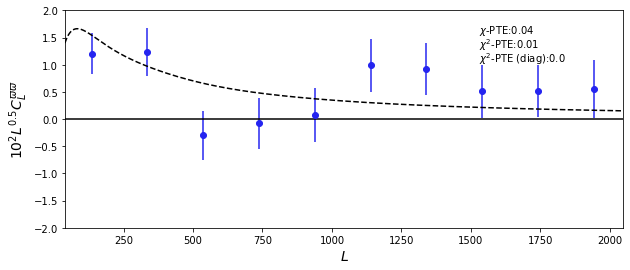

In [19]:
plot_spec(qobj,bnum=10,lmin=40)

chi: 2.0 , chi (sim mean): 0.0 , chi (sim std): 5.9 , PTE: 0.70 
chi^2: 5.5 , chi^2 (sim): 11.1 , PTE: 0.91 
chi: 2.0 , chi (sim mean): 0.0 , chi (sim std): 5.9 , PTE: 0.70 
chi^2: 4.1 , chi^2 (sim): 11.1 , PTE: 0.97 


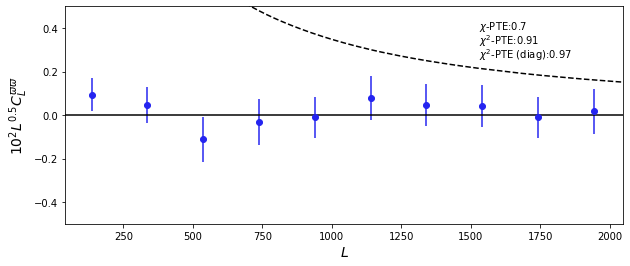

In [20]:
plot_spec(robj,bnum=10,lmin=40,ylim=[-.5,.5])